inspired by https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Lorenz%20Differential%20Equations.ipynb and others
# Exploring the Chua System of Differential Equations
## Overview

In this Notebook we explore the Lorenz system of differential equations:

$$
\begin{aligned}
\dot{x} & = \alpha(y-x-g(x)) \\
\dot{y} & = \beta(x - y + z) \\
\dot{z} & = -\gamma y \\
g(x) & = 
\begin{cases}
  m_1x+m_1-m_0 & \text{if $x\le -1$} \\
          m_0x & \text{if $x\le 1$} \\
  m_1x+m_0-m_1 & \text{else}
  \end{cases}
\end{aligned}
$$

This is one of the classic systems in non-linear differential equations. It exhibits a range of different behaviors as the parameters (\\(\alpha\\), \\(\beta\\), \\(\gamma\\), \\(m_0\\), \\(m_1\\)) are varied.

## Imports

First, we import the needed things from IPython, NumPy, Matplotlib and SciPy. 

In [23]:
%matplotlib inline

In [24]:
from ipywidgets import interact, interactive, HBox, Layout,VBox
from IPython.display import clear_output, display, HTML

## Computing the trajectories and plotting the result

We define a function that can integrate the differential equations numerically and then plot the solutions. This function has arguments that control the parameters of the differential equation (\\(\alpha\\), \\(\beta\\), \\(\gamma\\), \\(m_0\\), \\(m_1\\), the numerical integration (`max_time`), the number of trajectories to be followed (`N`) and the visualization (`xangle`, `yangle`). An additional import ist made to gain access to the method doing the actual calculation and plotting. It is encapsulated in its very own python script:

In [25]:
from chuaSystem import solve_chua

Let's call the function once to view the solutions. For this set of parameters, we see the trajectories swirling around two points, called attractors. 

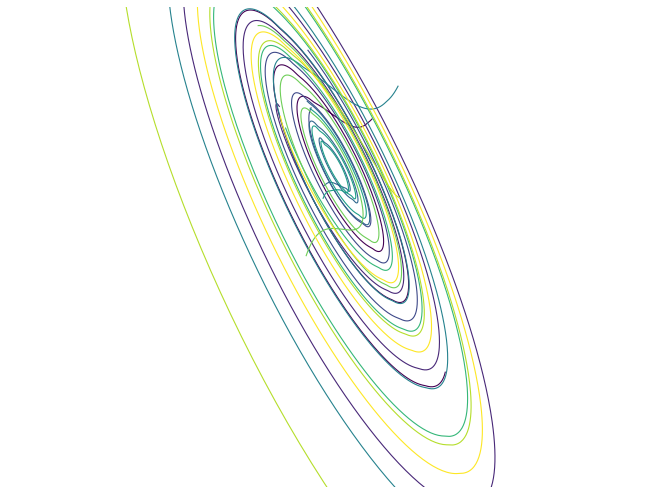

In [26]:
t, x_t = solve_chua(anglex=0, angley=120, numberOfTrajectories=10)

Using IPython's `interactive` function, we can explore how the trajectories behave as we change the various parameters. The nuts and bolts of laying out the widgets and components are again encapsulated in a separate python script providing the function `layoutWidgets`.

In [27]:
from layoutWidgets import layout

w = interactive(solve_chua, anglex=(0.,360.), angley=(0.,360.), max_time=(0.1, 40.0), 
                numberOfTrajectories=(0,50), alpha=(0.0,50.0), beta=(0.0,50.0), gamma=(-50,50), m0=(-10,10),m1=(-10,10))

layout(w)